In [1]:
import sys
sys.path.append('.')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from horseshoe_scale_sampler import sample_local_scale

## Sample from the local scale conditionals with different $\beta / \tau$ values.

In [2]:
n_sample = 10 ** 5
gscale = np.random.exponential()
beta_list = np.array([.01, 1., 100.]) * gscale

lscale_samples = [
    sample_local_scale(beta * np.ones(n_sample), gscale)
    for beta in beta_list
]

## Compare the empirical to the exact distribution.

In [3]:
def compute_target_pdf(x, beta, gscale, normalized=True):
    log_prior = - np.log(1 + x ** 2) 
    loglik = - .5 * (beta / gscale / x) ** 2 - np.log(x)
    logp = loglik + log_prior
    logp -= np.max(logp) 
        # Avoid numerical under-flow when exponentiating.
    pdf = np.exp(logp)
    if normalized:
        pdf /= np.trapz(pdf, x)
    return pdf

def plot_hist_against_target(ax, lscale_samples, beta, gscale):
    
    # Restrict the plot range; otherwise, the empirical 
    # distribution of a heavy-tailed target is unstable.
    max_quantile = .99
    upper_lim = np.quantile(lscale_samples, max_quantile)
    bins = np.linspace(0, upper_lim, 51)
    
    x = np.linspace(0, upper_lim, 1001)[1:]
    ax.hist(lscale_samples, bins=bins, density=True,
            label='empirical dist')
    ax.plot(x, compute_target_pdf(x, beta, gscale),
            label='target pdf')
    ax.set_xlabel(
        r'$\lambda \, | \, \beta / \tau = {:1g}$'.format(beta / gscale)
    )
    ax.set_yticks([])
    
def remove_figure_box_edges(ax, sides=['left', 'right', 'top']):
    for side in sides:
        ax.spines[side].set_visible(False)

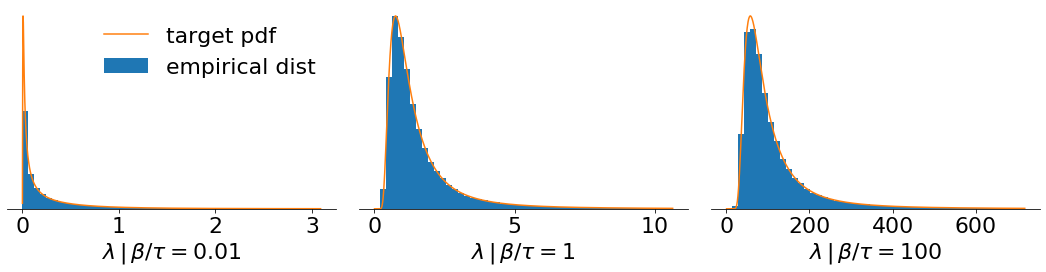

In [4]:
plt.rcParams['font.size'] = 22
fig, axes = plt.subplots(1, 3, figsize=(15, 4.25))

for i in range(len(beta_list)):
    plot_hist_against_target(
        axes[i], lscale_samples[i], beta_list[i], gscale
    )
    remove_figure_box_edges(axes[i])

axes[0].legend(frameon=False)
plt.tight_layout()
plt.show()